In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-and-youtube-data/Spotify Youtube Dataset.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import os
os.listdir('/kaggle/input/spotify-and-youtube-data')

['Spotify Youtube Dataset.csv']

In [4]:
data = pd.read_csv('/kaggle/input/spotify-and-youtube-data/Spotify Youtube Dataset.csv',encoding='latin1')

In [5]:
data

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,...,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9.227144e+06
20714,20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,...,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,1.089818e+07
20715,20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,...,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6.226110e+06
20716,20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,...,https://www.youtube.com/watch?v=VMFLbFRNCn0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533.0,88.0,0.0,Provided to YouTube by Routenote\n\nONLY GIRL ...,True,True,6.873961e+06


In [6]:
data.columns                   # to show the names of columns of the dataframe

Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [7]:
data.info()                   # to get some basic information about the datset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

In [8]:
# removing the columns from the dataframe

data.drop(columns = ['Unnamed: 0', 'Url_spotify', 'Uri', 'Url_youtube'], inplace = True)

In [9]:
data

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Duration_ms,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.008360,...,222640.0,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.086900,...,200173.0,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,0.042500,...,215150.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,2.0,-5.810,0.0260,0.000015,...,233867.0,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,0.025300,...,340920.0,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,SICK LEGEND,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,0.582,0.926,5.0,-6.344,0.0328,0.448000,...,94667.0,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9.227144e+06
20714,SICK LEGEND,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,0.531,0.936,4.0,-1.786,0.1370,0.028000,...,150857.0,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,1.089818e+07
20715,SICK LEGEND,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,0.443,0.830,4.0,-4.679,0.0647,0.024300,...,136842.0,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6.226110e+06
20716,SICK LEGEND,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,0.417,0.767,9.0,-4.004,0.4190,0.356000,...,108387.0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533.0,88.0,0.0,Provided to YouTube by Routenote\n\nONLY GIRL ...,True,True,6.873961e+06


In [10]:
# checking missing values counts in each column of the dataframe

data.isna().sum()

Artist                0
Track                 0
Album                 0
Album_type            0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

In [11]:
# filling the missing values with 0 in Likes & Commnets column

data['Likes'] =  data['Likes'].fillna(0)
data['Comments'] = data['Comments'].fillna(0)

In [12]:
data.isnull().sum()     # to check the count of missing values in each column

Artist                0
Track                 0
Album                 0
Album_type            0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Title               470
Channel             470
Views               470
Likes                 0
Comments              0
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

In [13]:
data.dropna(inplace = True)               # It drops the rows that contains all or any missing values

In [14]:
data.isnull().sum()     # to check the count of missing values in each column

Artist              0
Track               0
Album               0
Album_type          0
Danceability        0
Energy              0
Key                 0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_ms         0
Title               0
Channel             0
Views               0
Likes               0
Comments            0
Description         0
Licensed            0
official_video      0
Stream              0
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19298 entries, 0 to 20717
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            19298 non-null  object 
 1   Track             19298 non-null  object 
 2   Album             19298 non-null  object 
 3   Album_type        19298 non-null  object 
 4   Danceability      19298 non-null  float64
 5   Energy            19298 non-null  float64
 6   Key               19298 non-null  float64
 7   Loudness          19298 non-null  float64
 8   Speechiness       19298 non-null  float64
 9   Acousticness      19298 non-null  float64
 10  Instrumentalness  19298 non-null  float64
 11  Liveness          19298 non-null  float64
 12  Valence           19298 non-null  float64
 13  Tempo             19298 non-null  float64
 14  Duration_ms       19298 non-null  float64
 15  Title             19298 non-null  object 
 16  Channel           19298 non-null  object 
 17

# Q.1) Top 10 Artists - with the Highest Views on YouTube?

In [16]:
data.head(2)

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Duration_ms,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.00836,...,222640.0,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.08690,...,200173.0,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08


In [17]:
Artist_grouped =  data.groupby('Artist')['Views'].sum()

In [18]:
Artist_grouped

Artist
$NOT               1.107849e+08
$uicideboy$        3.317202e+08
(G)I-DLE           1.754954e+09
*NSYNC             1.027833e+09
070 Shake          9.609936e+07
                       ...     
will.i.am          2.830801e+09
Ãngela Aguilar    1.385295e+09
Ãejo              6.266808e+08
Ãengo Flow        8.127263e+08
Ãneheart          3.462331e+07
Name: Views, Length: 2040, dtype: float64

In [19]:
Artist_sorted =  Artist_grouped.sort_values(ascending = False)

In [20]:
Artist_sorted.head(10)

Artist
Ed Sheeran                 1.546021e+10
CoComelon                  1.460167e+10
Katy Perry                 1.312063e+10
Charlie Puth               1.216759e+10
Luis Fonsi                 1.162811e+10
Justin Bieber              1.099079e+10
Daddy Yankee               1.086828e+10
Bruno Mars                 1.023184e+10
Macklemore & Ryan Lewis    1.012206e+10
Coldplay                   9.997278e+09
Name: Views, dtype: float64

# Q.2) Top 10 Tracks - with the Highest Streams on Spotify?

In [21]:
data.head(1)

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Duration_ms,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.177,0.00836,...,222640.0,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09


In [22]:
x = data[['Track', 'Stream']]          # creating a new dataframe with 2 columns - Track & Stream

x

,Track,Stream
0,Feel Good Inc.,1.040235e+09
1,Rhinestone Eyes,3.100837e+08
2,New Gold (feat. Tame Impala and Bootie Brown),6.306347e+07
3,On Melancholy Hill,4.346636e+08
4,Clint Eastwood,6.172597e+08
...,...,...
20713,JUST DANCE HARDSTYLE,9.227144e+06
20714,SET FIRE TO THE RAIN HARDSTYLE,1.089818e+07
20715,OUTSIDE HARDSTYLE SPED UP,6.226110e+06
20716,ONLY GIRL HARDSTYLE,6.873961e+06


In [23]:
most_stream_track =  x.sort_values(by = ['Stream'], ascending=False).head(10) # sorting the dataframe wrt Stream column

In [24]:
most_stream_track

,Track,Stream
15250,Blinding Lights,3.386520e+09
12452,Shape of You,3.362005e+09
19186,Someone You Loved,2.634013e+09
17937,rockstar (feat. 21 Savage),2.594927e+09
17445,Sunflower - Spider-Man: Into the Spider-Verse,2.538330e+09
17938,Sunflower - Spider-Man: Into the Spider-Verse,2.538330e+09
13503,One Dance,2.522432e+09
16099,Closer,2.456205e+09
16028,Closer,2.456205e+09
14030,Believer,2.369272e+09


# Q.3) What are the most common Album Types on Spotify? How many tracks belong to each album type?

In [25]:
data.head(1)

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Duration_ms,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.177,0.00836,...,222640.0,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09


In [26]:
data.Album_type.unique()              # to check the unique values in a column

array(['album', 'single', 'compilation'], dtype=object)

In [27]:
a_type =  data['Album_type'].value_counts()     # It shows all unique values with their counts in the column

a_type

Album_type
album          13952
single          4653
compilation      693
Name: count, dtype: int64

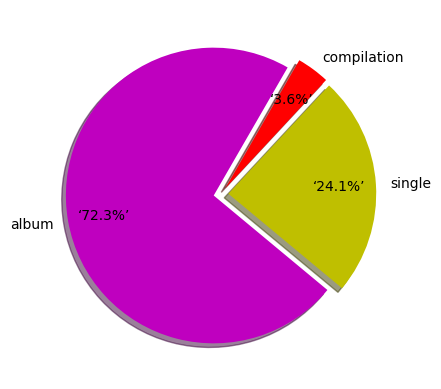

In [28]:
# draw a Pie chart

plt.pie( a_type, labels =  a_type.index, autopct = "‘%1.1f%%’", startangle= 60 , 
        colors= 'myr', shadow='True', explode = (0.05,0.05,0.05),  pctdistance = 0.75)

plt.show()

Pie Chart -
plt.pie(slices, labels= activities, colors = ‘bryg’, startangle= , shadow=True, explode=(0,0,0.1,0.2), autopct= ‘%1.1f%%’, pctdistance=0.75 ) .

Slices = [12,15,20,10] ,

activities = [‘eating’, ‘ sleeping’ , ‘working’, ‘playing’].

Explode – To cut the slices out.

Autopct – To show the % on the chart using string format.

pctdistance – Distance of % from center

Compare parts of data to the whole. It shows the size of items(wedges) in one data series proportional to the sum of the items.

# Q.4) How do the Average Views, Likes, and Comments are compared between different Album Types?

In [29]:
data.head(1)

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Duration_ms,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.177,0.00836,...,222640.0,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09


In [30]:
# group the Album Type column, and show the mean of three columns

df = data.groupby('Album_type')[['Likes', 'Views', 'Comments']].mean()

df

,Likes,Views,Comments
Album_type,,,
album,672593.609948,1.014359e+08,29032.951548
compilation,544275.818182,8.500535e+07,18074.903319
single,722266.303890,8.480843e+07,27313.048571


In [31]:
type(df)

pandas.core.frame.DataFrame

In [32]:
df = df.reset_index()                # rest_index - To convert the index of a Series into a column to form a DataFrame

df

,Album_type,Likes,Views,Comments
0,album,672593.609948,1.014359e+08,29032.951548
1,compilation,544275.818182,8.500535e+07,18074.903319
2,single,722266.303890,8.480843e+07,27313.048571


In [33]:
# melt - unpivot a dataframe

df_melted  = pd.melt( df, id_vars = 'Album_type', var_name = "Attribute", value_name = 'Total' )

df_melted

,Album_type,Attribute,Total
0,album,Likes,6.725936e+05
1,compilation,Likes,5.442758e+05
2,single,Likes,7.222663e+05
3,album,Views,1.014359e+08
4,compilation,Views,8.500535e+07
5,single,Views,8.480843e+07
6,album,Comments,2.903295e+04
7,compilation,Comments,1.807490e+04
8,single,Comments,2.731305e+04


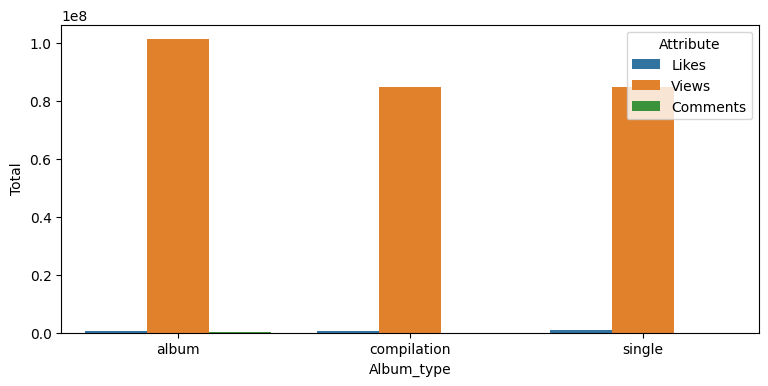

In [34]:
# Draw the Bar Plot

plt.figure(figsize = (9,4))

sns.barplot( x = 'Album_type', y = 'Total', hue = 'Attribute', data = df_melted );

# Q.5) Top 5 YouTube Channels - based on the Views?

In [35]:
data.head(1)

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Duration_ms,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.177,0.00836,...,222640.0,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09


In [36]:
c_views = data.groupby('Channel')['Views'].sum().sort_values(ascending=False).head()

c_views

Channel
T-Series            4.796159e+10
LuisFonsiVEVO       2.170252e+10
CalvinHarrisVEVO    1.828114e+10
Macklemore          1.700341e+10
Ed Sheeran          1.691822e+10
Name: Views, dtype: float64

In [37]:
c_views = c_views.reset_index()

c_views.head(10)

,Channel,Views
0,T-Series,4.796159e+10
1,LuisFonsiVEVO,2.170252e+10
2,CalvinHarrisVEVO,1.828114e+10
3,Macklemore,1.700341e+10
4,Ed Sheeran,1.691822e+10


In [38]:
type(c_views)

pandas.core.frame.DataFrame

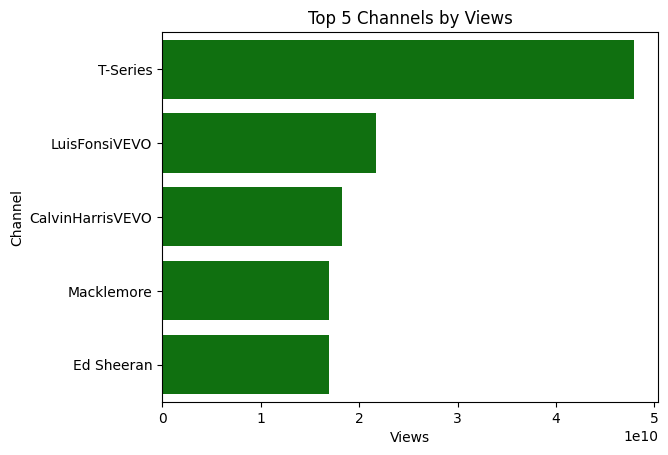

In [39]:
# sns.set_style("whitegrid")

sns.barplot( x = "Views", y = "Channel", data = c_views, color='green')
plt.title('Top 5 Channels by Views')
plt.xlabel('Views')
plt.ylabel('Channel')
plt.show()

# Q.6) The Top Most Track - based on Views?

In [40]:
data.head(2)

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Duration_ms,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.00836,...,222640.0,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.08690,...,200173.0,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08


In [41]:
data.sort_values( by = 'Views', ascending = False).head(1)

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Duration_ms,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
1147,Luis Fonsi,Despacito,VIDA,album,0.655,0.797,2.0,-4.787,0.153,0.198,...,229360.0,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,8.079649e+09,50788652.0,4252791.0,âDespacitoâ disponible ya en todas las pla...,True,True,1.506598e+09


# Q.7) Which Top 7 Tracks have the highest Like-to-View ratio on YouTube?

In [42]:
data.head(1)

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Duration_ms,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.177,0.00836,...,222640.0,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09


In [43]:
track_lv = data[['Track', 'Likes', 'Views']]

track_lv

,Track,Likes,Views
0,Feel Good Inc.,6220896.0,693555221.0
1,Rhinestone Eyes,1079128.0,72011645.0
2,New Gold (feat. Tame Impala and Bootie Brown),282142.0,8435055.0
3,On Melancholy Hill,1788577.0,211754952.0
4,Clint Eastwood,6197318.0,618480958.0
...,...,...,...
20713,JUST DANCE HARDSTYLE,1113.0,71678.0
20714,SET FIRE TO THE RAIN HARDSTYLE,2019.0,164741.0
20715,OUTSIDE HARDSTYLE SPED UP,329.0,35646.0
20716,ONLY GIRL HARDSTYLE,88.0,6533.0


In [44]:
track_lv.insert(3, 'LV_Ratio', data['Likes']/data['Views'] )

In [45]:
track_lv

,Track,Likes,Views,LV_Ratio
0,Feel Good Inc.,6220896.0,693555221.0,0.008970
1,Rhinestone Eyes,1079128.0,72011645.0,0.014985
2,New Gold (feat. Tame Impala and Bootie Brown),282142.0,8435055.0,0.033449
3,On Melancholy Hill,1788577.0,211754952.0,0.008446
4,Clint Eastwood,6197318.0,618480958.0,0.010020
...,...,...,...,...
20713,JUST DANCE HARDSTYLE,1113.0,71678.0,0.015528
20714,SET FIRE TO THE RAIN HARDSTYLE,2019.0,164741.0,0.012256
20715,OUTSIDE HARDSTYLE SPED UP,329.0,35646.0,0.009230
20716,ONLY GIRL HARDSTYLE,88.0,6533.0,0.013470


In [46]:
track_lv.sort_values( by = 'LV_Ratio', ascending = False).head(7)

,Track,Likes,Views,LV_Ratio
19968,Intro,237761.0,954081.0,0.249204
19969,Safety Zone,453910.0,1952637.0,0.232460
19967,Future,250116.0,1180522.0,0.211869
19971,Pandora's Box,253702.0,1265231.0,0.200518
16297,My Universe - Galantis Remix,371437.0,2067753.0,0.179633
15065,Burn It (feat. MAX),188244.0,1054438.0,0.178525
8105,No.2 (with parkjiyoon),346440.0,2050047.0,0.168991


# Top Albums having the Tracks with Maximum Danceability ?

In [47]:
data.head(1)

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Duration_ms,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.177,0.00836,...,222640.0,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09


In [48]:
# creating groups for each Album

T_danceability =  data.groupby('Album')['Danceability'].sum().sort_values(ascending=False)

T_danceability

Album
Greatest Hits                                                                              17.356
Hamilton (Original Broadway Cast Recording)                                                16.610
HEROES & VILLAINS                                                                          14.300
RODZINNY BIZNES                                                                            13.491
An Evening With Silk Sonic                                                                 13.349
                                                                                            ...  
Israeli Salad                                                                               0.000
Soothing Brown Noise Waves and Calming Ambient Combinations (Loopable and without Fade)     0.000
Voyager - Essential Max Richter                                                             0.000
White Noise                                                                                 0.000
Hello, Dolly! 

In [49]:
data[data.Album == 'Greatest Hits']          # filtering the dataframe with 'Greatest Hits'

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Duration_ms,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
220,2Pac,Hit 'Em Up - Single Version,Greatest Hits,compilation,0.916,0.844,7.0,-3.967,0.2360,0.0394,...,312627.0,2Pac - Hit 'Em Up (Dirty) (Music Video) HD,Seven Hip-Hop,585712131.0,4363164.0,208460.0,Music video by 2Pac performing Hit 'Em Up (Dir...,False,False,375955728.0
222,2Pac,California Love - Original Version,Greatest Hits,compilation,0.763,0.850,7.0,-3.052,0.0417,0.0304,...,284907.0,2Pac ft. Dr. Dre - California Love (Official V...,UPROXX Video,84654029.0,484619.0,12875.0,2Pac ft. Dr. Dre - California Love (Full Video...,False,False,497213287.0
225,2Pac,Changes,Greatest Hits,compilation,0.865,0.665,7.0,-6.289,0.0730,0.0453,...,268827.0,2pac - Changes Original Music Video,The Best,306542.0,4350.0,305.0,2pac - Changes Original Music Video,False,False,411056377.0
268,Fleetwood Mac,Gypsy,Greatest Hits,compilation,0.622,0.540,5.0,-13.990,0.0261,0.0170,...,264907.0,Fleetwood Mac - Gypsy (Official Music Video),Fleetwood Mac,81512369.0,436530.0,17764.0,You're watching the official music video for F...,True,True,213673856.0
1232,Bruce Springsteen,Streets of Philadelphia - Single Edit,Greatest Hits,compilation,0.741,0.290,5.0,-13.251,0.0302,0.2940,...,195080.0,Bruce Springsteen - Streets of Philadelphia (O...,BruceSpringsteenVEVO,171514802.0,669935.0,25407.0,"Official Video of âStreets Of Philadelphia"" ...",True,True,239663934.0
1236,Bruce Springsteen,Secret Garden,Greatest Hits,compilation,0.520,0.329,0.0,-14.224,0.0266,0.5760,...,266613.0,"Bruce Springsteen Secret Garden HD, Jerry Magu...",VJ,25696359.0,104022.0,4674.0,My music video of Bruce Springsteen's beautifu...,False,False,69059523.0
1862,Shania Twain,From This Moment On - Pop On-Tour Version,Greatest Hits,compilation,0.460,0.505,9.0,-5.487,0.0266,0.4200,...,235107.0,From This Moment On (Pop On-Tour Version),Shania Twain - Topic,2629831.0,30669.0,65.0,Provided to YouTube by Universal Music Group\n...,True,True,84623227.0
2164,Wyclef Jean,Killing Me Softly With His Song,Greatest Hits,compilation,0.765,0.437,4.0,-10.122,0.0727,0.0271,...,290293.0,Fugees - Killing Me Softly With His Song (Offi...,TheFugeesVEVO,351401822.0,2549466.0,42859.0,"""Killing Me Softly With His Song"" by Fugees\n\...",True,True,518080621.0
3079,Tracy Chapman,Stand by Me - Live at the Late Show with David...,Greatest Hits,compilation,0.816,0.144,7.0,-10.148,0.0398,0.7970,...,169013.0,Tracy Chapman - Stand by Me (Live on Letterman...,Tracy Chapman Online,16971605.0,134753.0,0.0,â¥ Subscribe our newsletter âº https://www.a...,False,False,44060055.0
3097,Blondie,Maria,Greatest Hits,compilation,0.548,0.800,9.0,-6.926,0.0597,0.0380,...,249427.0,Maria - Blondie,Paola1311,70126379.0,263063.0,9124.0,"Blondie, Maria",False,False,90857487.0


#  What is the Correlation between Views, Likes, Comments, and Stream?

In [50]:
data.head(1)

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Duration_ms,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.177,0.00836,...,222640.0,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09


In [51]:
# creating a new dataframe with 4 columns

df_vlcs = data[['Views', 'Likes', 'Comments', 'Stream']] 

df_vlcs

,Views,Likes,Comments,Stream
0,693555221.0,6220896.0,169907.0,1.040235e+09
1,72011645.0,1079128.0,31003.0,3.100837e+08
2,8435055.0,282142.0,7399.0,6.306347e+07
3,211754952.0,1788577.0,55229.0,4.346636e+08
4,618480958.0,6197318.0,155930.0,6.172597e+08
...,...,...,...,...
20713,71678.0,1113.0,0.0,9.227144e+06
20714,164741.0,2019.0,0.0,1.089818e+07
20715,35646.0,329.0,0.0,6.226110e+06
20716,6533.0,88.0,0.0,6.873961e+06


In [52]:
df_vlcs.corr()                      # correlation matrix for the required columns

,Views,Likes,Comments,Stream
Views,1.000000,0.891695,0.431077,0.603510
Likes,0.891695,1.000000,0.631035,0.655808
Comments,0.431077,0.631035,1.000000,0.267833
Stream,0.603510,0.655808,0.267833,1.000000


<Axes: >

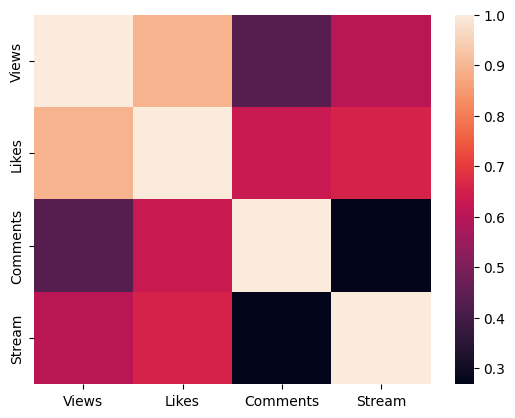

In [53]:
sns.heatmap(df_vlcs.corr())            # drawing a heatmap for the correlation matri

Thank you!